In [9]:
import os
import numpy as np
from astropy.io import fits
from astropy.nddata import bitmask, block_reduce
from astropy.utils.data import get_pkg_data_filename
from acstools.findsat_mrt import TrailFinder

In [10]:
image_file = get_pkg_data_filename('./Data/fits/tic27.fit')
image = fits.getdata(image_file, ext=0)
image = image - np.nanmedian(image)
image = block_reduce(image, 4, func=np.nansum)

In [11]:
s = TrailFinder(image, processes=8,threshold=50,min_length=10, min_persistence=1)
s.run_mrt()
s.find_mrt_sources()
s.filter_sources(trim_catalog=True)
s.make_mask()
s.save_output()

INFO:utils_findsat_mrt:Calculating median Radon Transform with 8 processes
INFO:findsat_mrt:Detection threshold: 50
INFO:findsat_mrt:Using kernel c:\Python310\lib\site-packages\acstools\data\rt_line_kernel_width15.fits
INFO:findsat_mrt:{no} sources found using kernel: 0
INFO:findsat_mrt:Using kernel c:\Python310\lib\site-packages\acstools\data\rt_line_kernel_width7.fits
INFO:findsat_mrt:{no} sources found using kernel: 0
INFO:findsat_mrt:Using kernel c:\Python310\lib\site-packages\acstools\data\rt_line_kernel_width3.fits
INFO:findsat_mrt:{no} sources found using kernel: 0
INFO:findsat_mrt:Wrote diagnostic plot to .\_diagnostic.png
INFO:findsat_mrt:wrote catalog .\_catalog.fits


INFO:findsat_mrt:No sources to show


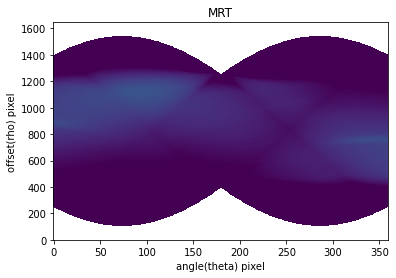

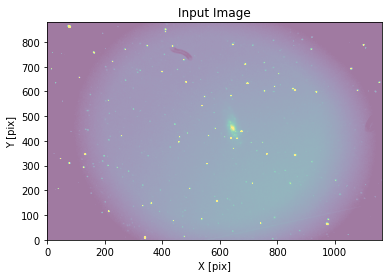

In [12]:
s.plot_mrt(show_sources=True)      # plots MRT with sources overlaid
s.plot_image(overlay_mask=True)    # plots input image with mask overlaid